In [132]:
import pickle
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb

In [133]:
symbol = 'AAPL'
start = pd.to_datetime('2010-02-01')
end = pd.to_datetime('2023-03-29')

In [134]:
data = yf.download(symbol, start, end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,6.870357,7.000000,6.832143,6.954643,5.919223,749876400
2010-02-02,6.996786,7.011429,6.906429,6.995000,5.953573,698342400
2010-02-03,6.970357,7.150000,6.943571,7.115357,6.056010,615328000
2010-02-04,7.026071,7.084643,6.841786,6.858929,5.837760,757652000
2010-02-05,6.879643,7.000000,6.816071,6.980714,5.941411,850306800
...,...,...,...,...,...,...
2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3312 entries, 2010-02-01 to 2023-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3312 non-null   float64
 1   High       3312 non-null   float64
 2   Low        3312 non-null   float64
 3   Close      3312 non-null   float64
 4   Adj Close  3312 non-null   float64
 5   Volume     3312 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 181.1 KB


In [136]:
y = data['Close']
X = data.drop(['Close'],axis=1)

In [137]:
X.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2010-02-01,6.870357,7.000000,6.832143,5.919223,749876400
2010-02-02,6.996786,7.011429,6.906429,5.953573,698342400
2010-02-03,6.970357,7.150000,6.943571,6.056010,615328000
2010-02-04,7.026071,7.084643,6.841786,5.837760,757652000
2010-02-05,6.879643,7.000000,6.816071,5.941411,850306800


In [138]:
y.head()

Date
2010-02-01    6.954643
2010-02-02    6.995000
2010-02-03    7.115357
2010-02-04    6.858929
2010-02-05    6.980714
Name: Close, dtype: float64

<AxesSubplot: >

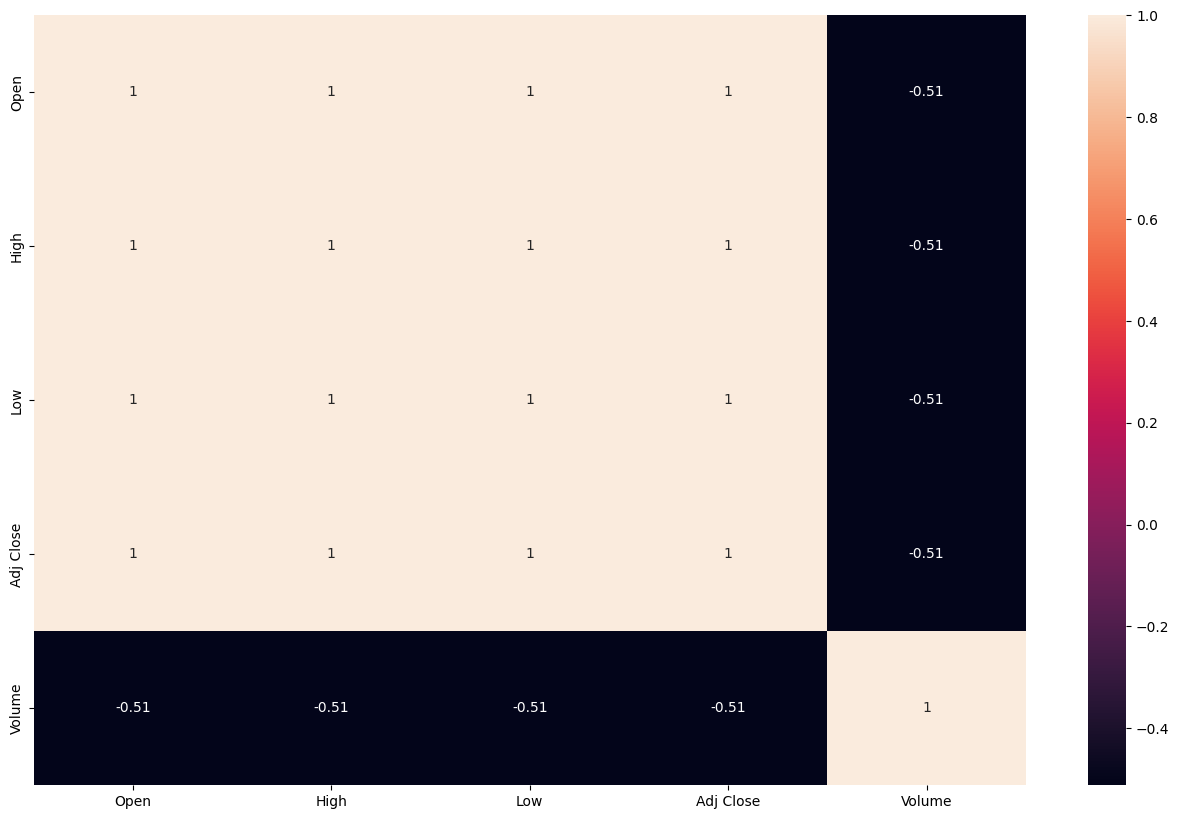

In [139]:
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [140]:
# Calculate the 20-day moving average of the closing price
ma_20 = data["Close"].rolling(window=20).mean()

In [141]:
X['ma_20']  = data["Close"].rolling(window=20).mean()
data['ma_20']    =  data["Close"].rolling(window=20).mean()

In [142]:
X['ma_5']  = data["Close"].rolling(window=5).mean()
data['ma_5']    =  data["Close"].rolling(window=5).mean()

In [143]:
X['ma_10']  = data["Close"].rolling(window=10).mean()
data['ma_10']    =  data["Close"].rolling(window=10).mean()

<AxesSubplot: >

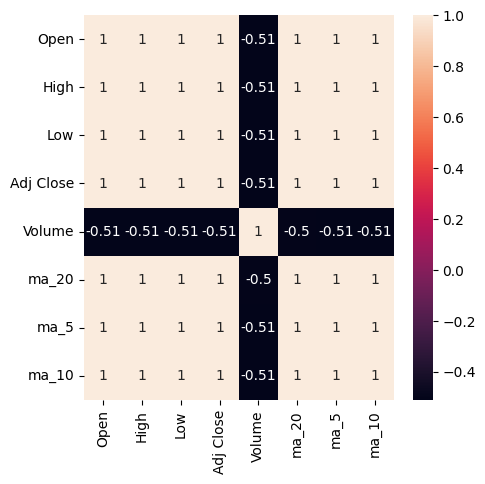

In [144]:
# Let's see the correlation matrix 
plt.figure(figsize = (5,5))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [145]:
X.head()

,Open,High,Low,Adj Close,Volume,ma_20,ma_5,ma_10
Date,,,,,,,,
2010-02-01,6.870357,7.000000,6.832143,5.919223,749876400,NaN,NaN,NaN
2010-02-02,6.996786,7.011429,6.906429,5.953573,698342400,NaN,NaN,NaN
2010-02-03,6.970357,7.150000,6.943571,6.056010,615328000,NaN,NaN,NaN
2010-02-04,7.026071,7.084643,6.841786,5.837760,757652000,NaN,NaN,NaN
2010-02-05,6.879643,7.000000,6.816071,5.941411,850306800,NaN,6.980929,NaN


In [146]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
# Create the XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [148]:
# Train the XGBoost regressor on the training set
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [149]:
# Use the trained model to make predictions on the testing set
preds = xg_reg.predict(X_test)

In [150]:
r2score = r2_score(preds,y_test)
r2score

0.3415575290154369

In [151]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, preds)
mse

622.483161225577

In [152]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 3

param_comb = 100

random_search = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=3, verbose=3, random_state=42)

In [153]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 2/3] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 3/3] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 1/3] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.957 total time=   0.4s
[CV 3/3] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.956 total time=   0.4s
[CV 2/3] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, sub

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(alpha=10, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.3,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learni...
                                          n_estimators=10, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [154]:
pred_hpt = random_search.predict(X_test)

r2score = r2_score(pred_hpt,y_test)

In [155]:
r2score

0.9999512750510426

In [156]:
mse = mean_squared_error(y_test, pred_hpt)
mse

0.11024154210900491